# <span style='color:red'>Lending Club Case Study.</span>

## <span style='color:brown'>SHIVANI KASHYAP</span>

### <span style='color:black'>Exploratory Data Analysis.</span>

#### <span style='color:black'>Problem Statement:</span>
The given "Loan Dataset" contains information, about past loan urban applicants.
Analyze the Loan Dataset (2007-2011) to identify patterns of the applicants, indicating potential loan defaults or not. Thereby helping the bank mitigate financial losses by taking various significant actions.
#### <span style='color:black'>AIM:</span>
Identification of such applicants using EDA is the aim of this case study.

#### <span style='color:black'>Approach:</span>
We are concerned about determining the driving factors (or driver variables) behind loan default, i.e. the variables that are strong indicators of default. 
The company can utilize this knowledge for its portfolio and risk assessment. 
This is the case of identification, where we are more interested in identifying the key driver variables, that lead to the outcome of loan defaulters.
   
<span style='color:blue'>A) Data Cleaning:<br></span>
1)Inspect the dataset for missing values, data types, and inconsistencies.<br>
2)Handle missing values and incorrect data types.<br>
3)Standardizing the Data.<br>
4)Remove or impute missing data where necessary.<br>

<span style='color:blue'>B) Data Manipulation:<br></span>
1)Identify and select relevant columns for the analysis.<br>
2)Ensure all columns have appropriate data types for analysis.<br>
3)Determine a way for Handling Missing Values(e.g., imputation, removal).<br>

<span style='color:blue'>C) Data Analysis:<br></span>
1)Exploratory Data Analysis (EDA): Use visualizations (e.g., histograms, box plots, scatter plots) to explore relationships between variables.<br>
2)Identifying if there are any outliers.

## Importing Modules and Libraries for EDA.

In [1596]:
# Import 'Warning' Module for Suppressing the Warning Messages
import warnings
warnings.filterwarnings('ignore')

#Import Libraries for Numerical and Data Analysis 
import pandas as pd
import numpy as np

#Import Libraries for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure inline plotting is enabled
%matplotlib inline

In [1598]:
#Command to view the libraries version imported.
#!pip show matplotlib
#!pip show seaborn
#!pip show pandas
#!pip show numpy
#!pip show plotly

## Loading, Reading, and Understanding the Dataset.

In [1601]:
#Importing dataset
loan = pd.read_csv("C:/Users/SHIVANI KASHYAP/Documents/ML-C65 ML and AI Batch May/EDA_Lending_Club_CaseStudy/loan.csv")
loan.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [1602]:
#To get the dimensions of the Dataframe (rows,cols)
loan.shape

(39717, 111)

## Displaying the details  about the data.

In [1604]:
## Display the number of columns
print('No. of Columns in the Dataset:',loan.shape[1])

## Display the number of rows
print('No. of Rows in the Dataset:',loan.shape[0])

## Display the number of unique values
print('No. of Unique values in the Dataset:',loan.nunique().sum().sum())

## Display the number of duplicates
print('No. of Duplicates in the Dataset:',loan.duplicated().sum())

No. of Columns in the Dataset: 111
No. of Rows in the Dataset: 39717
No. of Unique values in the Dataset: 416800
No. of Duplicates in the Dataset: 0


## Checking for Missing Values in the Dataset.

In [1606]:
# Check for missing values
missing_values = loan.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 emp_title                      2459
emp_length                     1075
desc                          12942
title                            11
mths_since_last_delinq        25682
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 68, dtype: int64


## As per the observation, there are columns with major missing values so lets proceed to drop them.

In [1608]:
# Drop columns with all missing values
columns_to_drop = ['tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit']
loan.drop(columns=columns_to_drop, inplace=True)

In [1609]:
# Remove columns with 50% or more null values
loan = loan.dropna(thresh=len(loan) * 0.5, axis=1)
# Shape of the dataframe after removing columns
print(loan.shape)

(39717, 54)


In [1610]:
# Checking the columns, to calculate the proportion of null values
null_percentages = loan.isna().mean() * 100
print(null_percentages.round(2).sort_values(ascending=False))

desc                          32.59
emp_title                      6.19
emp_length                     2.71
pub_rec_bankruptcies           1.75
last_pymnt_d                   0.18
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
revol_util                     0.13
tax_liens                      0.10
title                          0.03
last_credit_pull_d             0.01
total_rec_prncp                0.00
out_prncp                      0.00
initial_list_status            0.00
out_prncp_inv                  0.00
total_acc                      0.00
total_pymnt                    0.00
total_pymnt_inv                0.00
collection_recovery_fee        0.00
total_rec_int                  0.00
total_rec_late_fee             0.00
recoveries                     0.00
pub_rec                        0.00
last_pymnt_amnt                0.00
policy_code                    0.00
application_type               0.00
acc_now_delinq                 0.00
delinq_amnt                 

### More than 50% of the missing values have been removed, this has no impact on the analyis and will provide accurate results.

In [1612]:
# Display the columns in the dataframe
print(loan.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')


In [1613]:
# Shape of the dataframe after removing columns with major missing values
print(loan.shape)

(39717, 54)


In [1614]:
# Displaying the missing values across the rows in the Dataset.
print((loan.isna().sum(axis=1)).max())

6


### Maximum number of missing value in row is shown as '6', which shows low compared to the count of columns as 54.[After removing the unecessary columns],Lets proceed with the analysis, as the impact is not potential.

## Display the summary statistics.

In [1617]:
# Display the summary statistics
loan.describe(include='all')

id     member_id     loan_amnt   funded_amnt  \
count   3.971700e+04  3.971700e+04  39717.000000  39717.000000   
unique           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN   
mean    6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std     2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min     5.473400e+04  7.069900e+04    500.000000    500.000000   
25%     5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%     6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%     8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max     1.077501e+06  1.314167e+06  35000.000000  35000.000000   

        funded_amnt_inv        term int_rate   installment  grade sub_grade  \
count      39717.000000       39717    39717  39717.000000  39717     39717   
unique              NaN           2      371           NaN      7        35   
top                 NaN   36 months   10.99%           NaN      B        B3   
freq                NaN       29096      956           NaN  12020      2917   
mean       10397.448868         NaN      NaN    324.561922    NaN       NaN   
std         7128.450439         NaN      NaN    208.874874    NaN       NaN   
min            0.000000         NaN      NaN     15.690000    NaN       NaN   
25%         5000.000000         NaN      NaN    167.020000    NaN       NaN   
50%         8975.000000         NaN      NaN    280.220000    NaN       NaN   
75%        14400.000000         NaN      NaN    430.780000    NaN       NaN   
max        35000.000000         NaN      NaN   1305.190000    NaN       NaN   

        ... last_pymnt_amnt last_credit_pull_d collections_12_mths_ex_med  \
count   ...    39717.000000              39715                    39661.0   
unique  ...             NaN                106                        NaN   
top     ...             NaN             May-16                        NaN   
freq    ...             NaN              10308                        NaN   
mean    ...     2678.826162                NaN                        0.0   
std     ...     4447.136012                NaN                        0.0   
min     ...        0.000000                NaN                        0.0   
25%     ...      218.680000                NaN                        0.0   
50%     ...      546.140000                NaN                        0.0   
75%     ...     3293.160000                NaN                        0.0   
max     ...    36115.200000                NaN                        0.0   

        policy_code application_type acc_now_delinq chargeoff_within_12_mths  \
count       39717.0            39717        39717.0                  39661.0   
unique          NaN                1            NaN                      NaN   
top             NaN       INDIVIDUAL            NaN                      NaN   
freq            NaN            39717            NaN                      NaN   
mean            1.0              NaN            0.0                      0.0   
std             0.0              NaN            0.0                      0.0   
min             1.0              NaN            0.0                      0.0   
25%             1.0              NaN            0.0                      0.0   
50%             1.0              NaN            0.0                      0.0   
75%             1.0              NaN            0.0                      0.0   
max             1.0              NaN            0.0                      0.0   

       delinq_amnt pub_rec_bankruptcies tax_liens  
count      39717.0         39020.000000   39678.0  
unique         NaN                  NaN       NaN  
top            NaN                  NaN       NaN  
freq           NaN                  NaN       NaN  
mean           0.0             0.043260       0.0  
std            0.0             0.204324       0.0  
min            0.0        

## Removing the Irrelevant columns, as they relate more with the customer variables and are not available during decision making, hence can be dropped.

In [1619]:
# Dropping irrelevant columns, which are calculated after loan approval.
columns_to_drop = [
    'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
    'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
    'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'application_type',
    'title', 'emp_title', 'desc', 'url', 'zip_code', 'member_id', 'funded_amnt_inv'
]
loan.drop(columns_to_drop, axis=1, inplace=True)
print(loan.shape)

(39717, 26)


### Removed the above columns, as they are 'Customer behavior variables' and are not available at time of decision and hence not useful for analysis.

In [1623]:
# Reomval of irrelevant columns which contain 1 unique value
loan = loan.loc[:,loan.nunique()>1]
# Shape of the dataframe after columns are removed
print(loan.shape)

(39717, 18)


In [1624]:
# Print the Columns in the dataframe
print(loan.columns)

Index(['id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'pub_rec_bankruptcies'],
      dtype='object')


In [1628]:
# Checking for missing values
missing_values_count = loan.isna().sum().sort_values(ascending=False)
print(missing_values_count)

emp_length              1075
pub_rec_bankruptcies     697
annual_inc                 0
dti                        0
addr_state                 0
purpose                    0
loan_status                0
issue_d                    0
verification_status        0
id                         0
loan_amnt                  0
sub_grade                  0
grade                      0
installment                0
int_rate                   0
term                       0
funded_amnt                0
home_ownership             0
dtype: int64


In [1630]:
#Identify and display the most common value in the 'emp_length'.

# Calculate and print the mode of the 'emp_length' column
print("Mode : " + loan.emp_length.mode()[0])

# Display the value counts of the 'emp_length' column     
loan.emp_length.value_counts()

Mode : 10+ years


emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [1634]:
# Checking values in pub_rec_bankruptcies columns for inserting null values
print(loan.pub_rec_bankruptcies.value_counts())

pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64


### For'emp_length', we can remove the null values, as fixing null values are not feasible and will lead to loss of information.

In [1641]:
# Removing null values in emp_length columns
loan = loan.dropna(subset=['emp_length'])
# Shape of the dataframe after removing columns
print(loan.shape)

(38642, 18)


### For'pub_rec_bankruptcies', the data mostly contains value '0', which can be imputed in place of null due to no impact on the analysis.

In [1646]:
# Inserting 0 for null values in 'pub_rec_bankruptcies'
loan['pub_rec_bankruptcies'] = loan['pub_rec_bankruptcies'].fillna(0)

In [1648]:
# Checking for missing values
print(loan.isnull().sum())

id                      0
loan_amnt               0
funded_amnt             0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
pub_rec_bankruptcies    0
dtype: int64


## We have now fixed and removed null values to improve the accuracy of the analysis.

## Now lets Remove duplicate rows from the dataframe as below,

In [1653]:
# Removing duplicate rows in the dataframe
loan = loan.drop_duplicates(ignore_index=True)

# Shape of the dataframe after removing duplicate rows
print(loan.shape)

(38642, 18)


### No duplicate rows found in the dataframe.

### Data Preprocessing and Cleaning.

In [1657]:
# Checking information about the dataframe
print(loan.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38642 entries, 0 to 38641
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38642 non-null  int64  
 1   loan_amnt             38642 non-null  int64  
 2   funded_amnt           38642 non-null  int64  
 3   term                  38642 non-null  object 
 4   int_rate              38642 non-null  object 
 5   installment           38642 non-null  float64
 6   grade                 38642 non-null  object 
 7   sub_grade             38642 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        38642 non-null  object 
 10  annual_inc            38642 non-null  float64
 11  verification_status   38642 non-null  object 
 12  issue_d               38642 non-null  object 
 13  loan_status           38642 non-null  object 
 14  purpose               38642 non-null  object 
 15  addr_state         

In [1658]:
# Correcting data type and format for columns in the dataframe
## Deriving more columns with the conversion of data type
loan.term = loan.term.str.replace(' months', '').astype(int)
loan.int_rate = loan.int_rate.str.replace('%', '').astype(float).round(2)
loan.grade = loan.grade.astype('category')
loan.sub_grade = loan.sub_grade.astype('category')
loan.emp_length = loan.emp_length.str.replace('years', '').str.replace('+', '').str.replace('< 1', '0.5').str.replace('year', '').astype(float)
loan.home_ownership = loan.home_ownership.astype('category')
loan.verification_status = loan.verification_status.astype('category')
loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')
loan['issue_year'] = loan.issue_d.dt.year
loan['issue_month'] = loan.issue_d.dt.month
# Loan.loan_status = loan.loan_status.replace({'Fully Paid': 0, 'Charged Off': 1, 'Current': 2}).astype('int')
loan.purpose = loan.purpose.astype('category')
loan.addr_state = loan.addr_state.astype('category')

In [1659]:
# Setting decimal point limit for all data 
for x in loan.columns:
    if(loan[x].dtype=='float64'):
      loan[x]=loan[x].round(2)
      
loan.head()

id  loan_amnt  funded_amnt  term  int_rate  installment grade  \
0  1077501       5000         5000    36     10.65       162.87     B   
1  1077430       2500         2500    60     15.27        59.83     C   
2  1077175       2400         2400    36     15.96        84.33     C   
3  1076863      10000        10000    36     13.49       339.31     C   
4  1075358       3000         3000    60     12.69        67.79     B   

  sub_grade  emp_length home_ownership  annual_inc verification_status  \
0        B2        10.0           RENT     24000.0            Verified   
1        C4         0.5           RENT     30000.0     Source Verified   
2        C5        10.0           RENT     12252.0        Not Verified   
3        C1        10.0           RENT     49200.0     Source Verified   
4        B5         1.0           RENT     80000.0     Source Verified   

     issue_d  loan_status         purpose addr_state    dti  \
0 2011-12-01   Fully Paid     credit_card         AZ  27.65   
1 2011-12-01  Charged Off             car         GA   1.00   
2 2011-12-01   Fully Paid  small_business         IL   8.72   
3 2011-12-01   Fully Paid           other         CA  20.00   
4 2011-12-01      Current           other         OR  17.94   

   pub_rec_bankruptcies  issue_year  issue_month  
0                   0.0        2011           12  
1                   0.0        2011           12  
2                   0.0        2011           12  
3                   0.0        2011           12  
4                   0.0        2011           12

### The aim is to perform an analysis, to identify, who is likely to default and this can only result in the case of either fully paid or charged-off loans.
1. We cannot get any useful information, for the 'Current loans'.2. Hence to exclude that data, remove the records with 'Current' loan_status.

In [1662]:
# Filter out loans with a status of "Current" and Remove them.
loan = loan[loan.loan_status!='Current']
# Shape of the dataframe after removing columns
print(loan.shape)

(37544, 20)


### Data has been cleaned, fixed, and filtered as per requirement, we can choose columns, required for analysis.

In [1664]:
# selecting columns based on domain knowledge
## Id, Loan Amount, Term of loan, Interest Rate, Grade, Sub Grade, Emp Length, Home Ownership, Verification Status, Annual Income, Loan Status,Purpose of Loan, State provided by burrower, DTI ratio, Number of public record bankruptcies and derived columns of Issue month and year
loan = loan[['id','loan_amnt','term','int_rate','grade','sub_grade','emp_length','home_ownership','verification_status','annual_inc','loan_status','purpose','addr_state','dti','pub_rec_bankruptcies','issue_year','issue_month']]
# Shape of the dataframe after removing columns
loan.shape

(37544, 17)

In [1665]:
# Dividing the column as per categorical and numerical
cat_cols = ['term','grade','sub_grade','emp_length','home_ownership','verification_status','purpose','addr_state']
cont_cols=['loan_amnt','int_rate','annual_inc','dti','pub_rec_bankruptcies','issue_year','issue_month']
id_cols=['id']
result_cols=['loan_status']

# <span style='color:pink'>Exploratory Data Analysis.</span>

## <span style='color:purple'>1.Univariate Analysis.</span>

#### <span style='color:green'>OUTLIER DETECTION</span>
#### 1.Verifying outlier values in continuous columns via 'box plot'.
#### 2.The continuous columns are loan_amnt, int_rate, annual_inc, dti whereas the categorical columns are term, grade, sub_grade, emp_length,                  home_ownership, verification_status, purpose, addr_state, issue_month, issue_year, pub_rec_bankruptcies.
#### 3.We will check outlier using box plot and then remove the outliers as per the requirement.

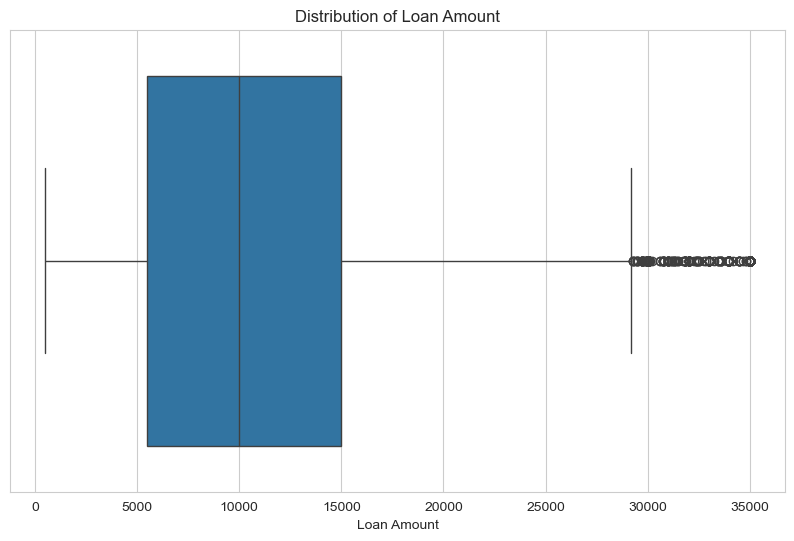

In [1674]:
## Import Libraries
import seaborn as sns
import matplotlib.pyplot as plt

## Set the plot style
sns.set_style('whitegrid')

## Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_amnt', data=loan)

## Set the title and labels
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')

## Show the plot
plt.show()

### <span style='color:red'>OBSERVATION</span> :Upper fence turns out to be around 29.175k =29175 approx, whereas max is 35k=35000, which is not much more then upper fence, therefore will not have much impact on the analysis.

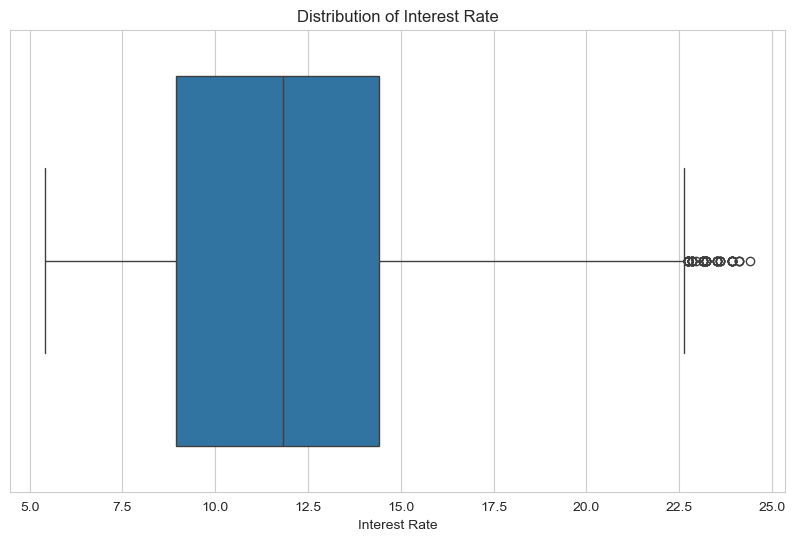

In [1676]:
## Import Libraries
import seaborn as sns
import matplotlib.pyplot as plt

## Set the plot style
sns.set_style('whitegrid')

## Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='int_rate', data=loan)

## Set the title and labels
plt.title('Distribution of Interest Rate')
plt.xlabel('Interest Rate')

## Show the plot
plt.show()

### <span style='color:red'>OBSERVATION</span> :
#### 1.Upper fence turns out to be around 22 approx, whereas max is 24.0 which is not much more then upper fence. 
#### 2.Thus it will not have that potential impact on the analysis.

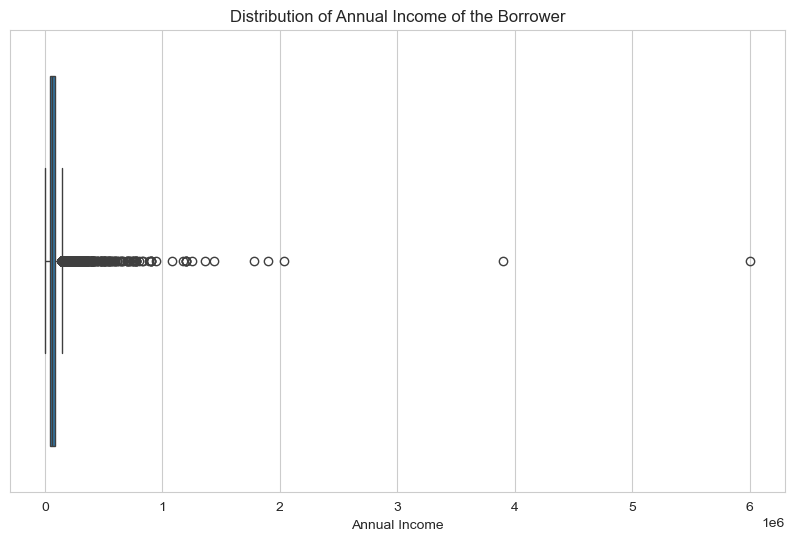

In [1679]:
## Import Libraries
import seaborn as sns
import matplotlib.pyplot as plt

## Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='annual_inc', data=loan)

## Set the title and labels
plt.title('Distribution of Annual Income of the Borrower')
plt.xlabel('Annual Income')

## Show the plot
plt.show()

### <span style='color:red'>OBSERVATION</span> :
#### 1.The boxplot shows that the distribution of annual income of the borrower, is highly skewed to the right, indicating a large number of borrowers with low annual income, and a few with very high annual income. The boxplot also shows the presence of outliers, which are borrowers with extremely high annual income. 

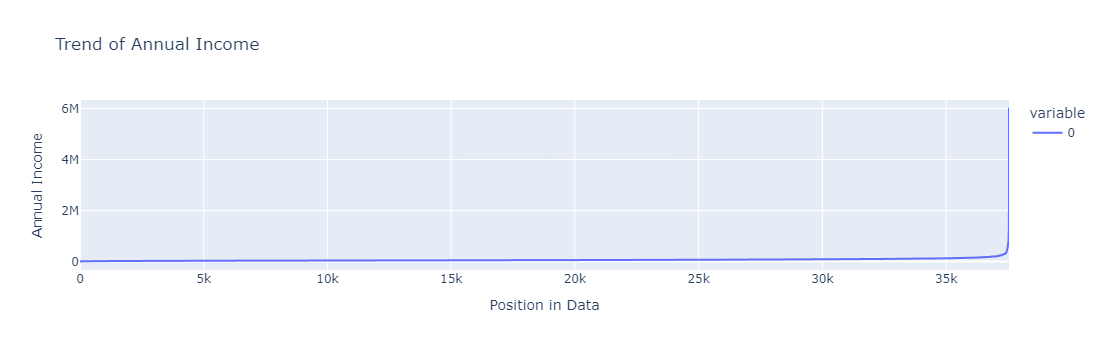

In [1683]:
## Import Libraries
import plotly.express as px
import pandas as pd
px.line(sorted(loan.annual_inc), width=750, height=350, 
        title='Trend of Annual Income',
        labels={'value':'Annual Income', 'index':'Position in Data'}).show()

### <span style='color:red'>OBSERVATION</span> :As per the observation, from the above line chart, the annual_inc is Skyrocketing around 99th percentile. Therefore, we can remove values greater than 99th percentile.

In [1685]:
## Removing outliers in annual_inc greater than 99th percentile
loan = loan[loan.annual_inc<=np.percentile(loan.annual_inc,99)]

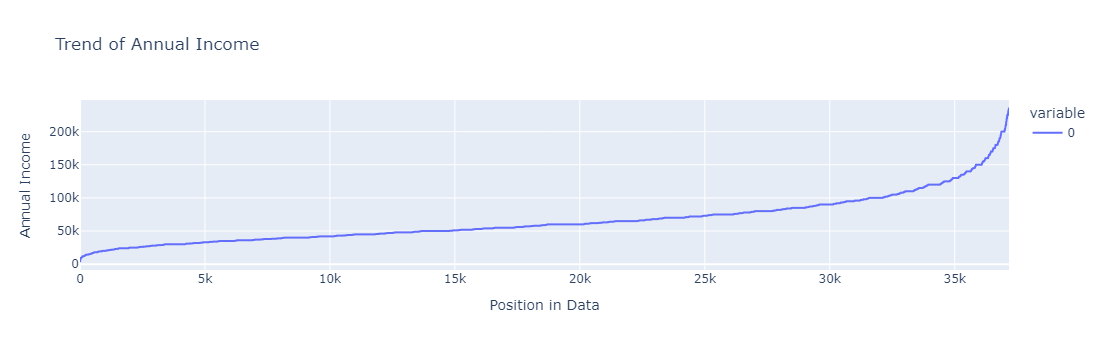

In [1688]:
## checking trend of values in annual_inc using line chart to find the appropriate quantile to use to remove outliers
px.line(sorted(loan.annual_inc),width=750,height=350,title='Trend of Annual Income',labels={'value':'Annual Income','index':'Position in Data'}).show()

### <span style='color:red'>OBSERVATION</span> :As the trend shown, is more compatible with the analysis.

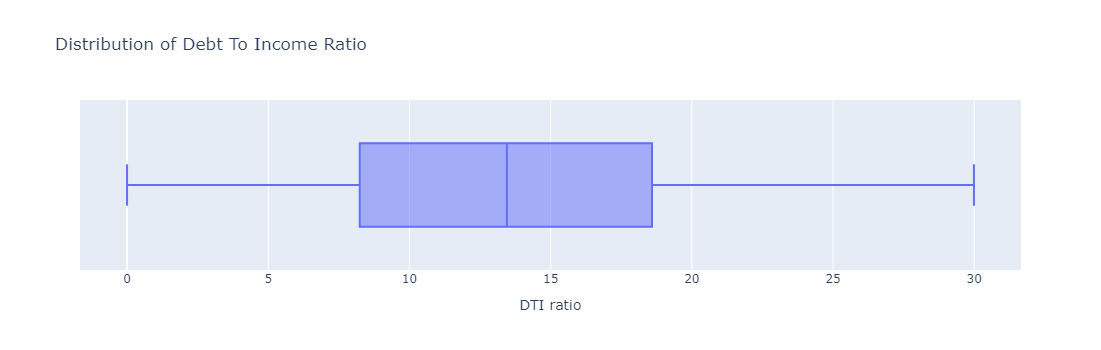

In [1691]:
## Using 'dti'
## I am using plotly for interactive charts and to retrieve value from chart for upper fence.
px.box(loan,x='dti',width=750,height=350,title='Distribution of Debt To Income Ratio',labels={'dti':'DTI ratio'}).show()

### <span style='color:red'>OBSERVATION</span> :There are no outliers in dti, hence we can move ahead with the analysis.

# "The data has been cleaned and outliers are removed, we can move proceed with the EDA."

# <span style='color:pink'>Exploratory Data Analysis.</span>
## <span style='color:purple'>1.Univariate Analysis.</span>

## Visualizing Distribution of Categorical Data.

### 1. Distribution of Loan_Status(Target Variable)

loan_status
Fully Paid     85.580932
Charged Off    14.419068
Name: count, dtype: float64


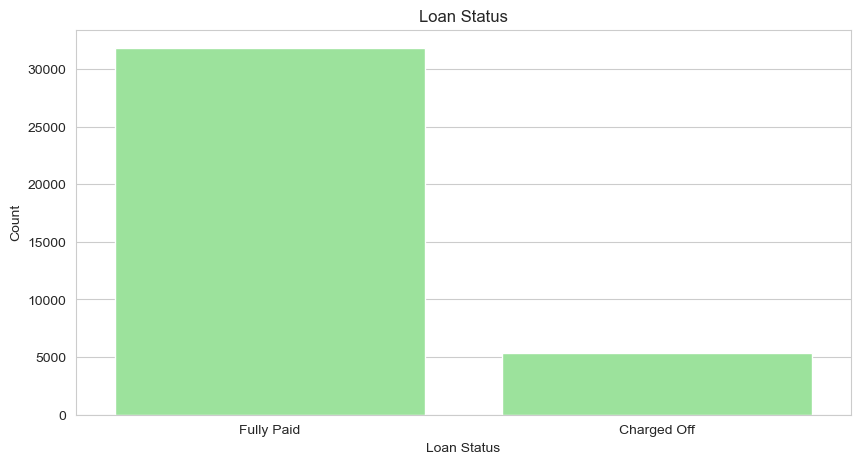

In [1698]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 5))
print(loan.loan_status.value_counts()*100/loan.loan_status.count())
sns.countplot(x = 'loan_status', data = loan , color = 'lightgreen' )
ax.set_title('Loan Status')
ax.set_xlabel('Loan Status')
ax.set_ylabel('Count')
plt.show()

#### <span style='color:red'>INFERENCE</span> :Charged off i.e Defaulted loans are low in numbers compared to Fully Paid.

### 2. Distribution of Loan_Amnt(Target Variable)

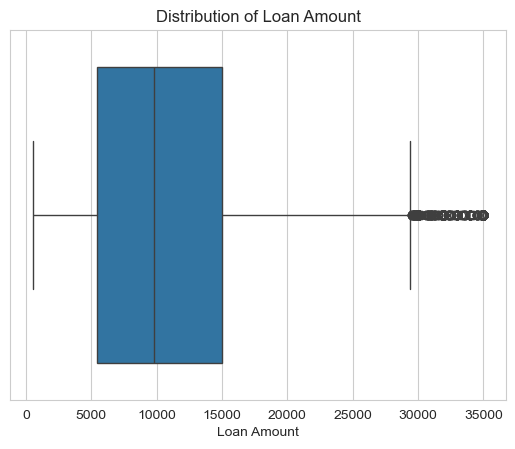

count    37173.000000
mean     11034.824335
std       7272.289190
min        500.000000
25%       5400.000000
50%       9800.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


In [1702]:
## Import Libraries
import matplotlib.pyplot as plt
import seaborn as sns
# Create a box plot of loan amount
sns.boxplot(x='loan_amnt', data=loan)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.show()
## Loan Amount
print(loan.loan_amnt.describe())

#### <span style='color:red'>INFERENCE</span> :
#### 1.The loan amount varies from 500 to 35000 with a median of 9800 approx.
#### 2.The data is right-skewed, meaning there are more loans with higher amounts than lower amounts.

### 3. Distribution of Loan Term(Target Variable)

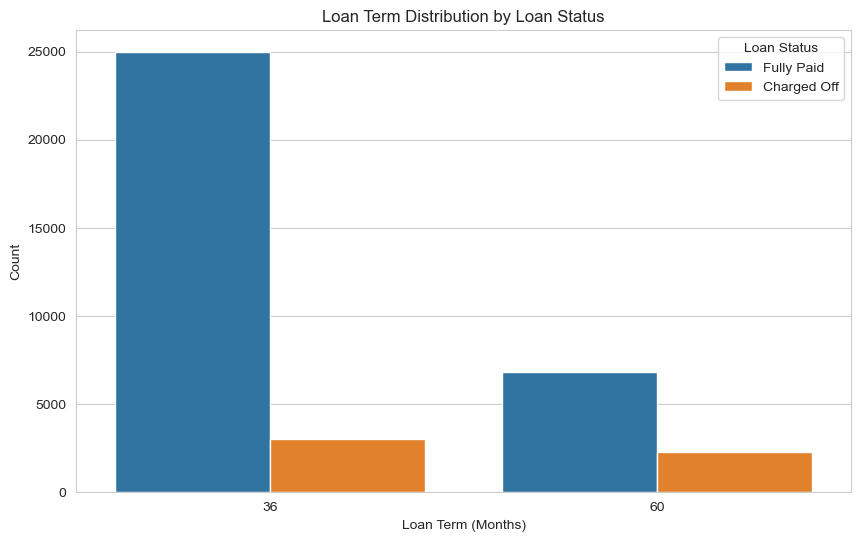

In [1706]:
# Plot the distribution of loan terms
plt.figure(figsize=(10, 6))
sns.countplot(x='term', hue='loan_status', data=loan)
plt.title('Loan Term Distribution by Loan Status')
plt.xlabel('Loan Term (Months)')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

#### <span style='color:red'>INFERENCE</span> :More than half of the loan taken has term of 36 months compared to 60 months.

### 4. Distribution of Interest_Rate(Target Variable)

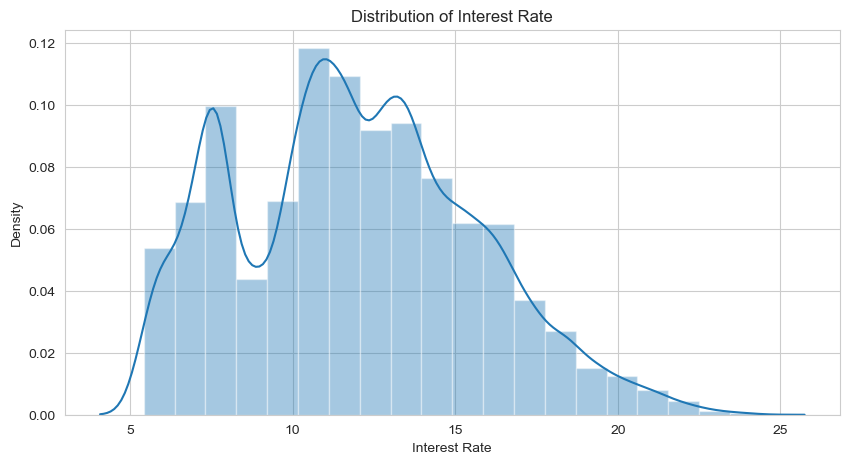

In [1710]:
# Distribution of interest rate
plt.figure(figsize=(10,5))
sns.distplot(sorted(loan.int_rate),kde=True,bins=20)
plt.xlabel('Interest Rate')
plt.ylabel('Density')
plt.title('Distribution of Interest Rate')
plt.show()

#### <span style='color:red'>INFERENCE</span> :The interest rate is more crowded around 5-10 and 10-15 with a drop near 10.

### 5. Distribution of Grade(Target Variable)

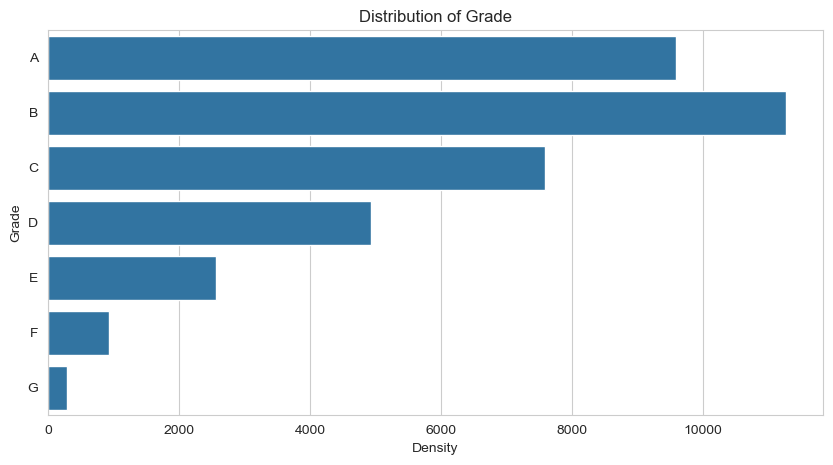

In [1714]:
plt.figure(figsize=(10,5))
sns.countplot(loan.grade)
plt.xlabel('Density')
plt.ylabel('Grade')
plt.title('Distribution of Grade')
plt.show()

#### <span style='color:red'>INFERENCE</span> :A large amount of loans are with grades 'B','A' followed by 'C' compared to the others. Showing most loans are high-grade loans.

### 6. Distribution of Secondary_Grade(Target Variable)

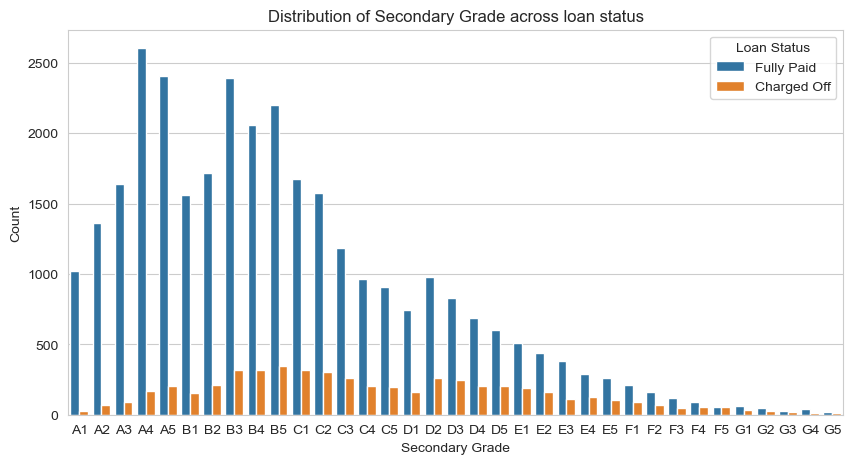

In [1718]:
# Distribution of Secondary Grade
#Import Libraries
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.countplot(x='sub_grade', data=loan, hue='loan_status')
plt.xlabel('Secondary Grade')
plt.ylabel('Count')
plt.title('Distribution of Secondary Grade across loan status')
plt.legend(title='Loan Status')
plt.show()

#### <span style='color:red'>INFERENCE</span> : A large amount of loans are with lower subgrade in grade 'A' category and 'B' compared to rest.

### 7. Distribution of emp_length(Target Variable)

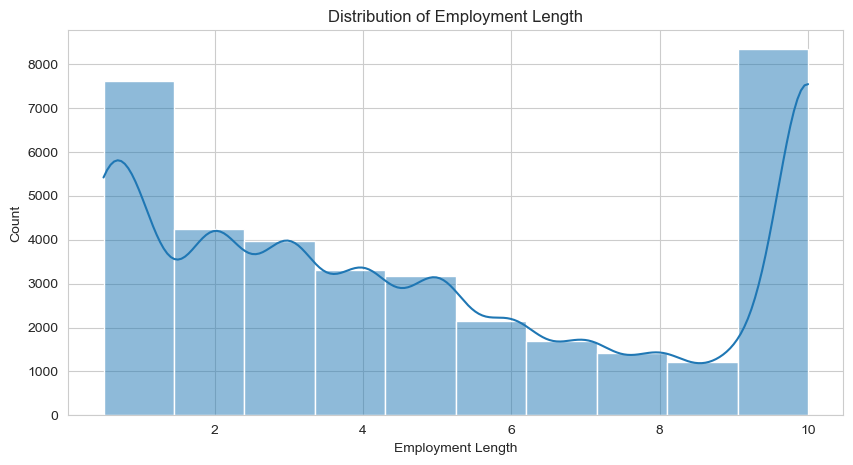

In [1722]:
plt.figure(figsize=(10,5))
sns.histplot(loan.emp_length, kde=True, palette='plasma', bins=10)
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.title('Distribution of Employment Length', fontsize=12)
plt.show()

#### <span style='color:red'>INFERENCE</span> :Majority of borrowsers have working experience greater than 10 years.

### 8. Distribution of home_ownership(Target Variable)

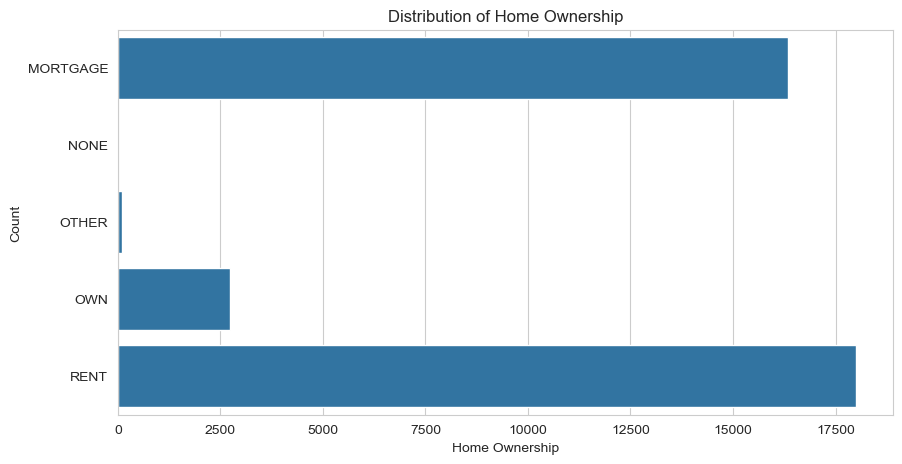

In [1725]:
plt.figure(figsize=(10,5))
sns.countplot(loan.home_ownership)
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Distribution of Home Ownership',fontsize=12)
plt.show()

#### <span style='color:red'>INFERENCE</span> :The majority of people are renting, while a significant number are paying a mortgage.

### 9. Distribution of verification_status(Target Variable)

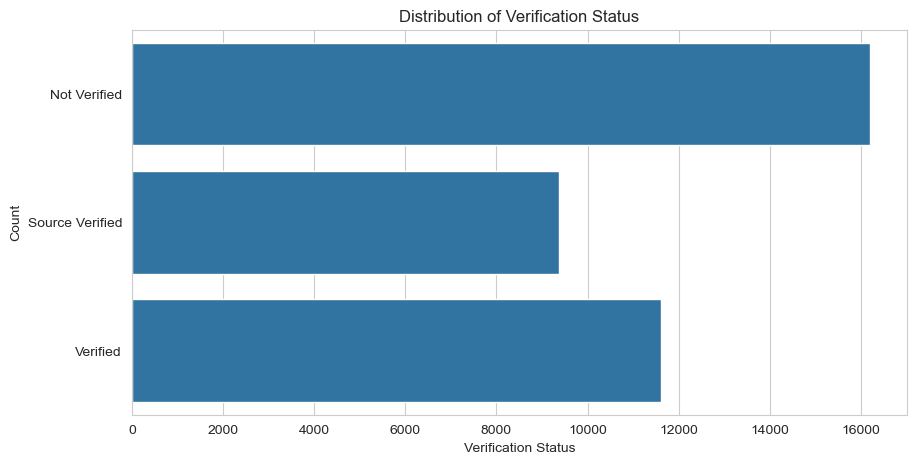

In [1729]:
# Distribution of verification_status
plt.figure(figsize=(10,5))
sns.countplot(loan.verification_status)
plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.title('Distribution of Verification Status',fontsize=12)
plt.show()

#### <span style='color:red'>INFERENCE</span> :The graph shows that most of the data is not verified and the least verified data is source verified.

### 10. Distribution of annual_inc(Target Variable)

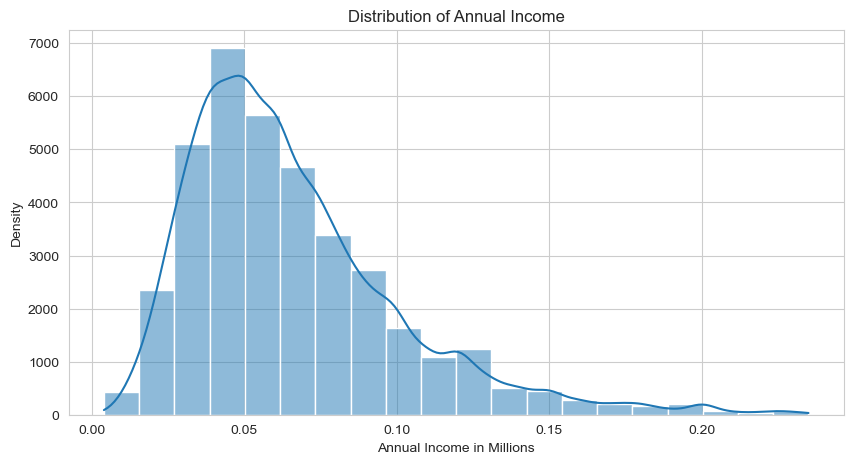

In [1732]:
plt.figure(figsize=(10,5))
sns.histplot(loan.annual_inc/1000000,kde=True,bins=20)
plt.xlabel('Annual Income in Millions')
plt.ylabel('Density')
plt.title('Distribution of Annual Income',fontsize=12)
plt.show()

#### <span style='color:red'>INFERENCE</span> :The distribution of annual income is right-skewed, suggesting a large proportion of individuals earn relatively low incomes while a smaller proportion earn very high incomes.

### 11. Distribution of purpose(Target Variable)

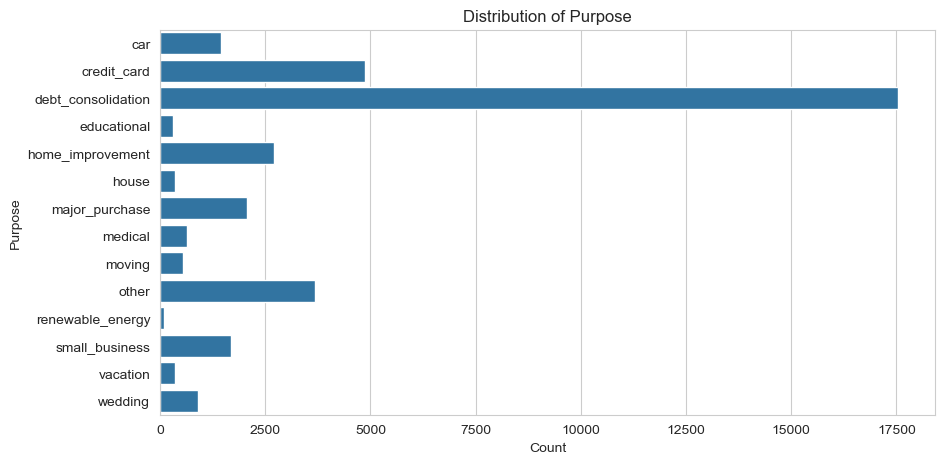

In [1737]:
plt.figure(figsize=(10,5))
sns.countplot(y=loan.purpose)
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.title('Distribution of Purpose',fontsize=12)
plt.show()

#### <span style='color:red'>INFERENCE</span> :A large percentage of loans are taken for debt consolidation purpose.

### 12. Distribution of addr_state(Target Variable)

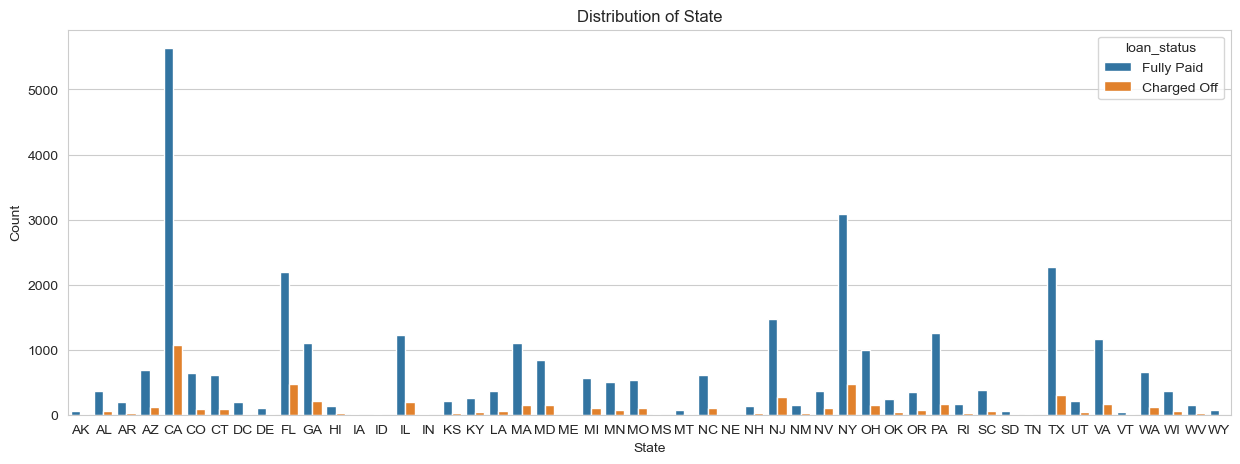

In [1740]:
plt.figure(figsize=(15,5))
sns.countplot(data=loan, x='addr_state', hue='loan_status')
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Distribution of State', fontsize=12)
plt.show()

#### <span style='color:red'>INFERENCE</span> :
#### 1.Majority of the Loan borrowers are from the large urban cities like California, New York, followed by Texas in fully paid loans.
#### 2.The state of California has the highest number of loans with a high proportion of loans getting Charged off.

### 13. Distribution of dti_ratio(Target Variable)

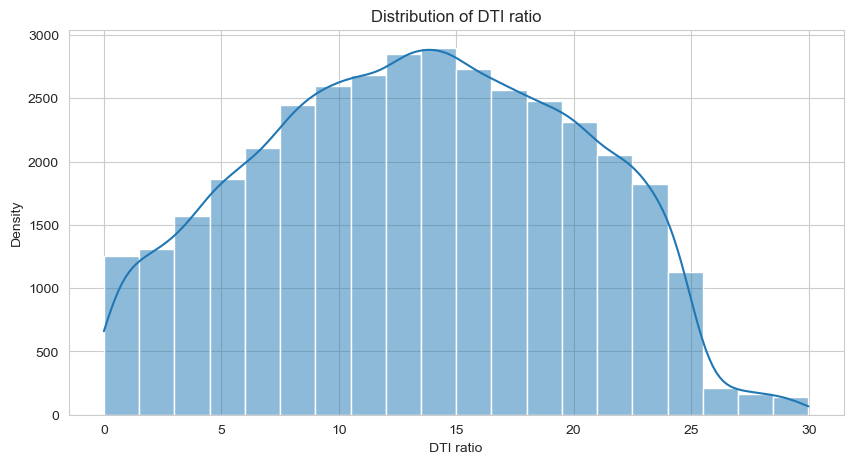

In [1743]:
plt.figure(figsize=(10,5))
sns.histplot(loan.dti,kde=True,bins=20)
plt.xlabel('DTI ratio')
plt.ylabel('Density')
plt.title('Distribution of DTI ratio',fontsize=12)
plt.show()

#### <span style='color:red'>INFERENCE</span> :The distribution of DTI ratio is right skewed with a peak around 15.

### 14. Distribution of pub_rec_bankruptcies(Target Variable)

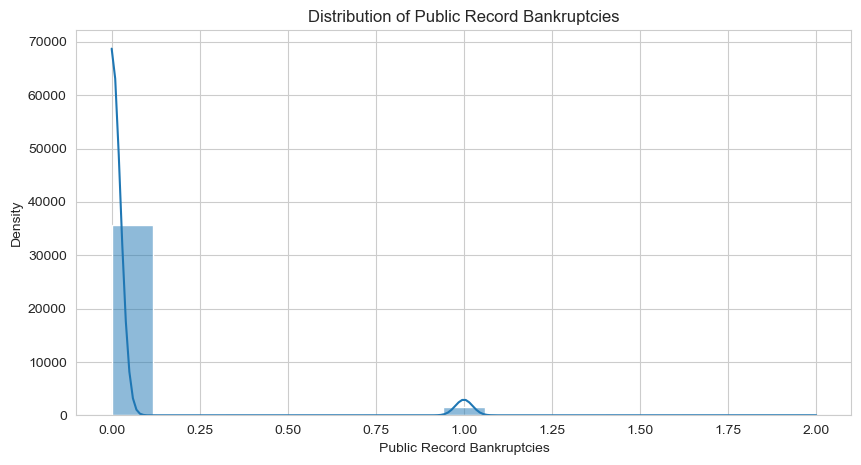

In [1747]:
# Distribution of pub_rec_bankruptcies
plt.figure(figsize=(10,5))
sns.histplot(loan.pub_rec_bankruptcies, kde=True)
plt.xlabel('Public Record Bankruptcies')
plt.ylabel('Density')
plt.title('Distribution of Public Record Bankruptcies',fontsize=12)
plt.show()

#### <span style='color:red'>INFERENCE</span> :The distribution of public record bankruptcies shows that a vast majority of people have zero bankruptcies while a small number have one or two.

### 15. Distribution of issue_month(Target Variable)

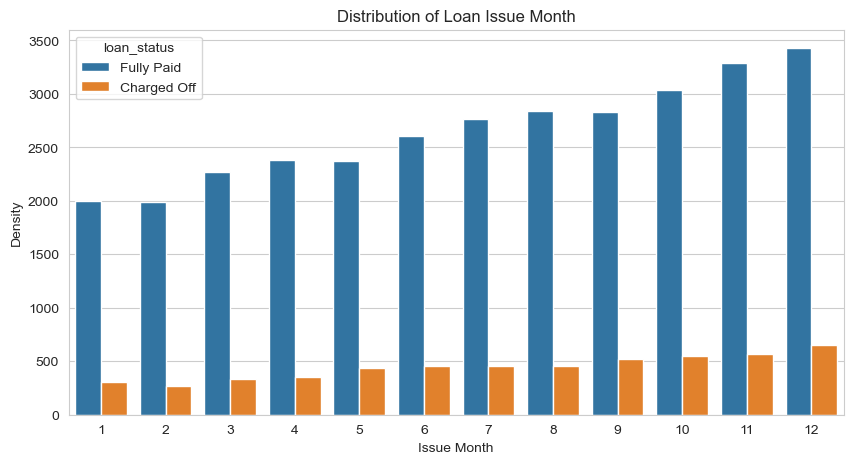

In [1752]:
# Distribution of issue_month
plt.figure(figsize=(10,5))
sns.countplot(data=loan, x='issue_month', hue='loan_status')
plt.xlabel('Issue Month')
plt.ylabel('Density')
plt.title('Distribution of Loan Issue Month', fontsize=12)
plt.show()

#### <span style='color:red'>INFERENCE</span> :Majority of the loans are given in last quarter of the year, i.e. between October to December.

### 16.Distribution of issue_year(Target Variable)

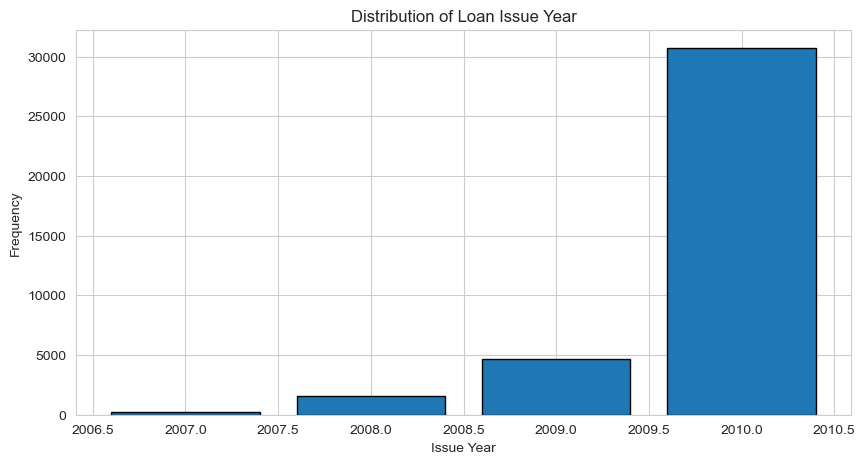

In [1756]:
plt.figure(figsize=(10,5))
plt.hist(loan.issue_year, bins=np.unique(loan.issue_year), edgecolor='black', align='left', rwidth=0.8)
plt.xlabel('Issue Year')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Issue Year',fontsize=12)
plt.show()

#### <span style='color:red'>INFERENCE</span>:The vast majority of loans were issued in 2010.

## <span style='color:purple'>2.Segmented Univariate Analysis.</span>

### <span style='color:orange'>2.1 Distribution of purpose based on loan_status</span>

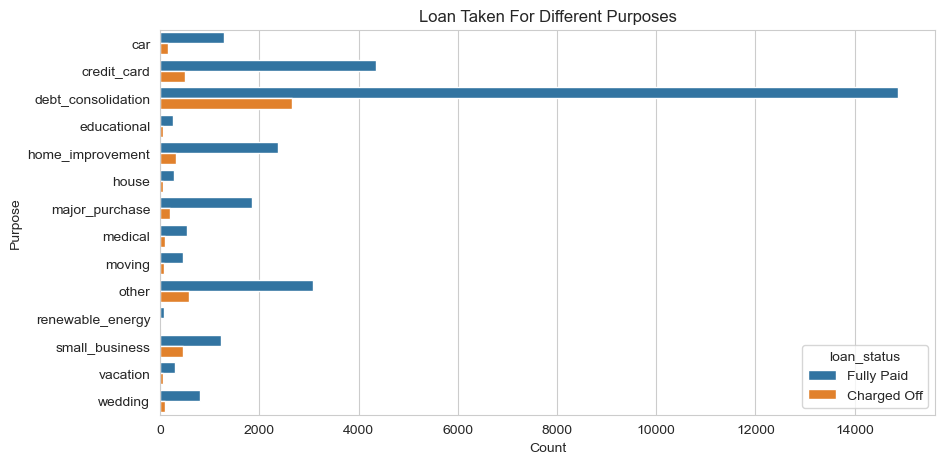

In [1761]:
plt.figure(figsize=(10,5))
sns.countplot(data=loan,y='purpose',hue='loan_status')
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.title('Loan Taken For Different Purposes',fontsize=12)
plt.show()

### <span style='color:red'>INFERENCE</span>:The plot shows the count of loans taken for different purposes, with a higher proportion of loans being taken for debt consolidation and having the status of fully paid.

### <span style='color:orange'>2.2 Distribution of loan_amnt based on loan_status</span>

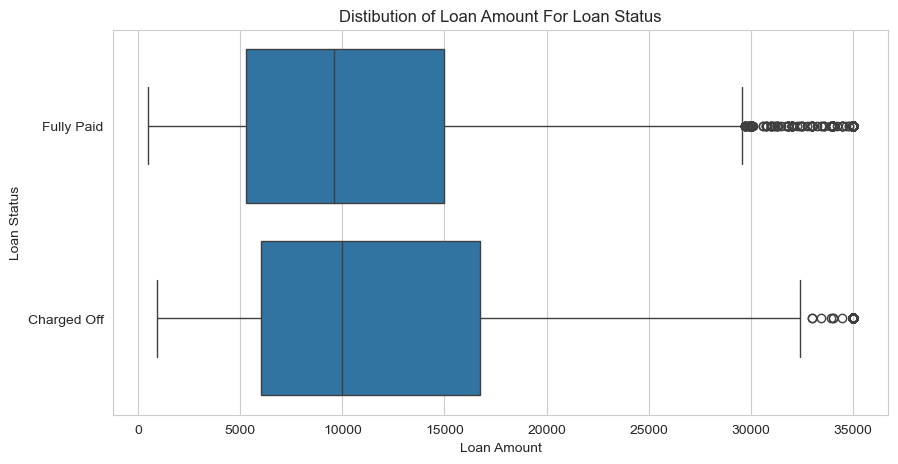

In [1765]:
plt.figure(figsize=(10,5))
sns.boxplot(data=loan,x='loan_amnt',y='loan_status')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Status')
plt.title('Distibution of Loan Amount For Loan Status',fontsize=12)
plt.show()

### <span style='color:red'>INFERENCE</span>:
#### 1.The mean and 25% percentile are same for both but we see larger 75% percentile in the defaulted loan which indicate large amount of loan has higher chance of defaulting.
#### 2.The loan amount for charged off loans is slightly higher than the loan amount for fully paid loans.

### <span style='color:orange'>2.3 Distribution of Term based on loan_status</span>

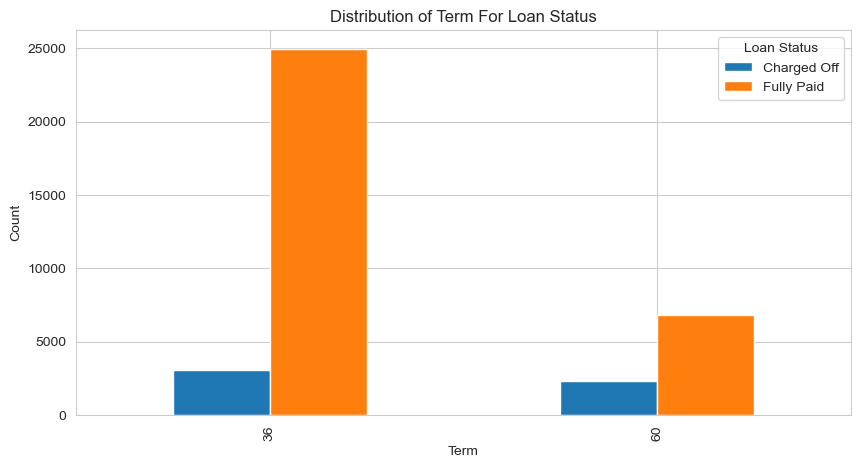

In [1769]:
#Using MatplotLib plot the insights.
import matplotlib.pyplot as plt

# Group the data by term and loan status and count the occurrences
term_loan_status = loan.groupby(['term', 'loan_status']).size().unstack()

# Plot the data
term_loan_status.plot(kind='bar', figsize=(10, 5))

# Adding labels and title
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Distribution of Term For Loan Status', fontsize=12)
plt.legend(title='Loan Status')
plt.show()

### <span style='color:red'>INFERENCE</span>:The graph shows that loans with a 36-month term have a higher count of both charged-off and fully paid statuses compared to loans with a 60-month term.

### <span style='color:orange'>2.4 Distribution of Term based on Grade</span>

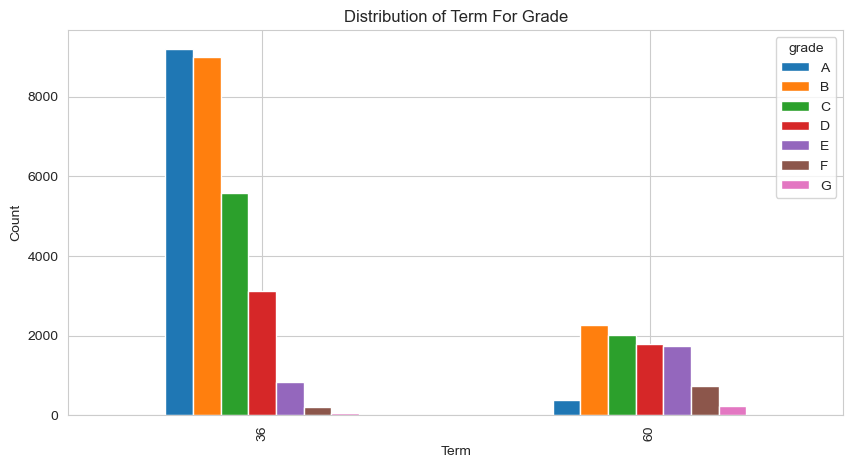

In [1774]:
## This approach leverages pandas and matplotlib for visualization.
import pandas as pd

term_grade_distribution = loan.groupby(['term', 'grade']).size().unstack()

# Plot the distribution
term_grade_distribution.plot(kind='bar', figsize=(10, 5))
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Distribution of Term For Grade', fontsize=12)
plt.show()

#### <span style='color:red'>INFERENCE</span>:The graph shows that loans with a 36-month term are predominantly of higher grades (A and B), while loans with a 60-month term have a more even distribution across various grades, with a noticeable increase in lower grades (C, D, and E).

### <span style='color:orange'>2.5 Distribution of DTI for Loan Status</span>

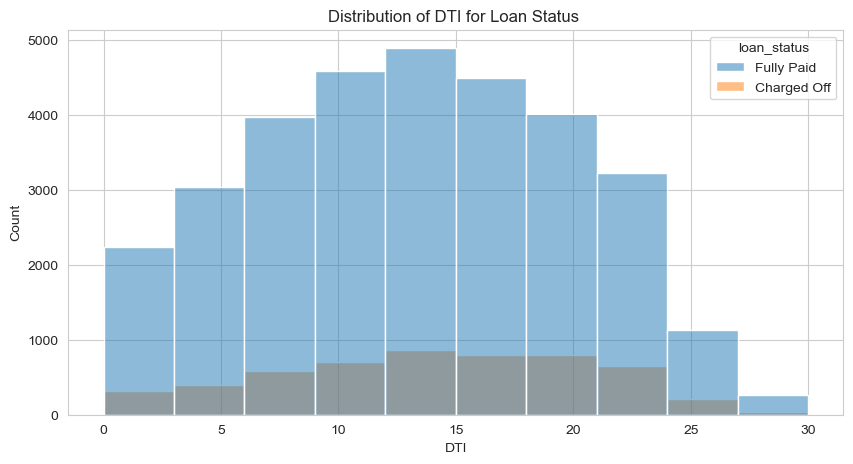

In [1779]:
plt.figure(figsize=(10,5))
sns.histplot(data=loan,x='dti',hue='loan_status',bins=10)
plt.xlabel('DTI')
plt.ylabel('Count')
plt.title('Distribution of DTI for Loan Status ',fontsize=12)
plt.show()

### <span style='color:red'>INFERENCE</span>:
#### 1. The Loan Status varies with DTI ratio, as observed in the above output, loans in DTI ranging between 10-15 have higher number of defaulted loan. However, higher dti has higher chance of defaulting the loan.
#### 2. The Debt-to-Income (DTI) ratio increases, the proportion of charged-off loans also increases, particularly for DTI ratios above 10.

### <span style='color:orange'>2.6 Distribution of annual_inc based on loan_status</span>

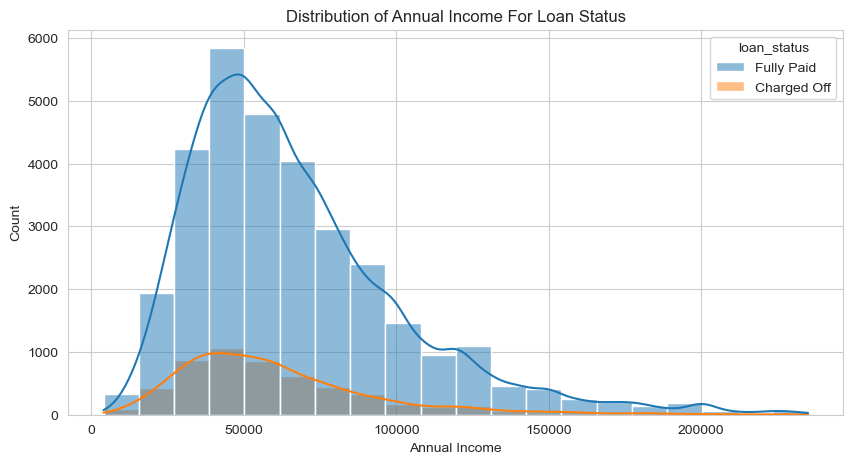

In [1783]:
plt.figure(figsize=(10,5))
sns.histplot(data=loan,x='annual_inc',hue='loan_status',bins=20,kde=True)
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Distribution of Annual Income For Loan Status',fontsize=12)
plt.show()

### <span style='color:red'>INFERENCE</span>:The annual income of the borrower is highly skewed, with a majority of borrowers having an annual income below 1 million.

### <span style='color:orange'>2.7 Distribution of house_ownership based on loan_status</span>

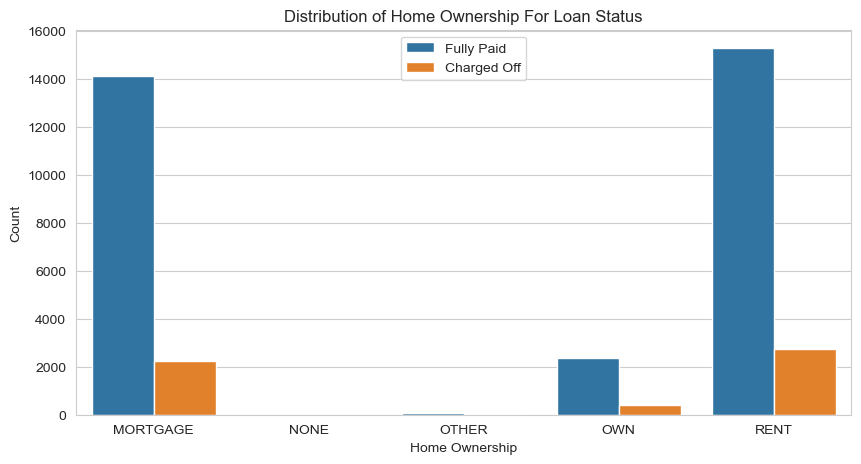

In [1787]:
plt.figure(figsize=(10,5))
sns.countplot(data=loan,x='home_ownership',hue='loan_status')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Distribution of Home Ownership For Loan Status',fontsize=12)
plt.legend(loc='upper center')
plt.show()

### <span style='color:red'>INFERENCE</span>:The Defaulted loan are lesser for the borrowers, who own their property compared to on mortgage or rent.

### <span style='color:orange'>2.8 Distribution of loan_status based on issue_year</span>

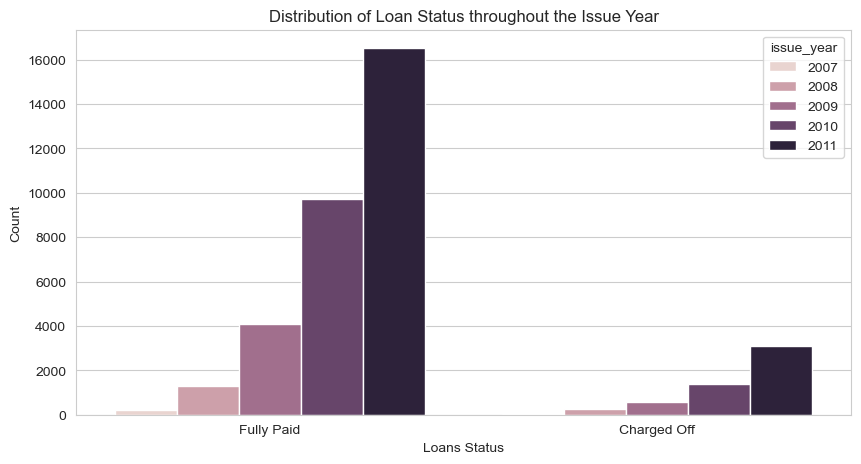

In [1791]:
plt.figure(figsize=(10,5))
sns.countplot(data=loan,x='loan_status',hue='issue_year')
plt.xlabel('Loans Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Status throughout the Issue Year',fontsize=12)
plt.show()

### <span style='color:red'>INFERENCE</span>:The Fully paid loan are increasing rapidly, with the time compared to Defaulted loan.

### <span style='color:orange'>2.9 Distribution of int_rate based on loan_status</span>

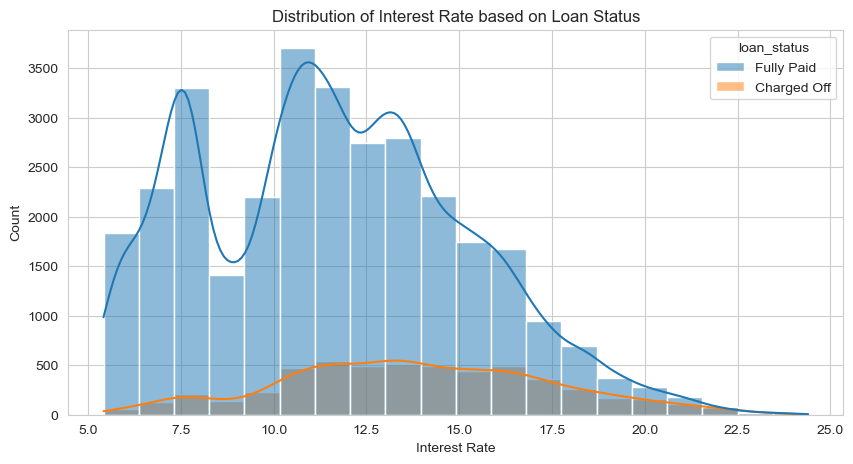

In [1795]:
plt.figure(figsize=(10,5))
sns.histplot(data=loan,x='int_rate',hue='loan_status', bins=20, kde=True)
plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.title('Distribution of Interest Rate based on Loan Status',fontsize=12)
plt.show()

### <span style='color:red'>INFERENCE</span>:
#### 1.The default loan amount increases with interest rate.
#### 2.Default Loan amount loans shows a decline after 17.5 % interest rate.

### <span style='color:orange'>2.10 Distribution of emp_length based on loan_status</span>

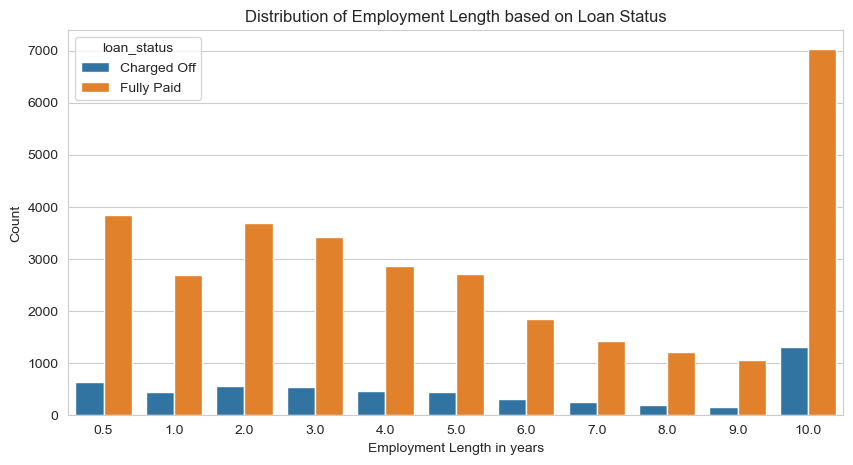

In [1798]:
plt.figure(figsize=(10,5))
sns.countplot(data=loan,x='emp_length',hue='loan_status')
plt.xlabel('Employment Length in years')
plt.ylabel('Count')
plt.title('Distribution of Employment Length based on Loan Status',fontsize=12)
plt.show()

### <span style='color:red'>INFERENCE</span>:The Employees having 10+ years of Employment experience are likely to default and have higher chance of fully paying the loan.

## <span style='color:purple'>3. Derived Metrics Analysis.</span>
### <span style='color:orange'>3.1 Compute Business-driven, Type-driven, and Data-driven Metrics</span>

#### By analyzing these metrics, lenders can gain insights into their loan portfolio, identify areas for improvement, and make better business decisions.

In [1804]:
# Compute Business-driven, Type-driven, and Data-driven Metrics

# Default Rate
default_rate = loan['loan_status'].value_counts(normalize=True).get('Charged Off', 0)

# Approval Rate
approval_rate = loan['loan_status'].value_counts(normalize=True).get('Fully Paid', 0)

# Average Loan Amount
average_loan_amount = loan['loan_amnt'].mean()

# Loan Amount Statistics
loan_amount_mean = loan['loan_amnt'].mean()
loan_amount_median = loan['loan_amnt'].median()
loan_amount_std = loan['loan_amnt'].std()

# Interest Rate Distribution
interest_rate_min = loan['int_rate'].min()
interest_rate_max = loan['int_rate'].max()
interest_rate_quartiles = loan['int_rate'].quantile([0.25, 0.5, 0.75])

# Loan Amount by State
loan_amount_by_state = loan.groupby('addr_state')['loan_amnt'].mean()

# Loan Default Rate by Income Bracket
income_brackets = pd.qcut(loan['annual_inc'], 4)
default_rate_by_income_bracket = loan.groupby(income_brackets)['loan_status'].apply(lambda x: (x == 'Charged Off').mean())

# Display computed metrics
default_rate, approval_rate, average_loan_amount, loan_amount_mean, loan_amount_median, loan_amount_std, interest_rate_min, interest_rate_max, interest_rate_quartiles, loan_amount_by_state, default_rate_by_income_bracket

(0.1441906760283001,
 0.8558093239716998,
 11034.824334866704,
 11034.824334866704,
 9800.0,
 7272.2891902429965,
 5.42,
 24.4,
 0.25     8.94
 0.50    11.83
 0.75    14.38
 Name: int_rate, dtype: float64,
 addr_state
 AK    12944.000000
 AL    11007.831325
 AR    10523.568282
 AZ    10724.685930
 CA    11200.924959
 CO    11311.989101
 CT    11155.988456
 DC    12276.540284
 DE    10091.818182
 FL    10533.987603
 GA    11125.457666
 HI    10853.858025
 IA    11290.000000
 ID     9958.333333
 IL    11235.990169
 IN     9580.555556
 KS    10735.143443
 KY    10638.110749
 LA    10249.024390
 MA    11113.760000
 MD    11360.534274
 ME     3066.666667
 MI    11147.744361
 MN    10502.796902
 MO    10761.565421
 MS     7322.368421
 MT    10158.766234
 NC    11183.901252
 NE     6340.000000
 NH    11616.129032
 NJ    11560.401146
 NM    10103.857143
 NV    10706.195652
 NY    11123.211771
 OH    10716.936897
 OK    11213.967972
 OR    10491.923990
 PA    10393.294818
 RI     9379.122340
 S

## <span style='color:purple'>4. Bivariate Analysis.</span>
### <span style='color:orange'>4.1 Interest Rate Vs Grade.</span>

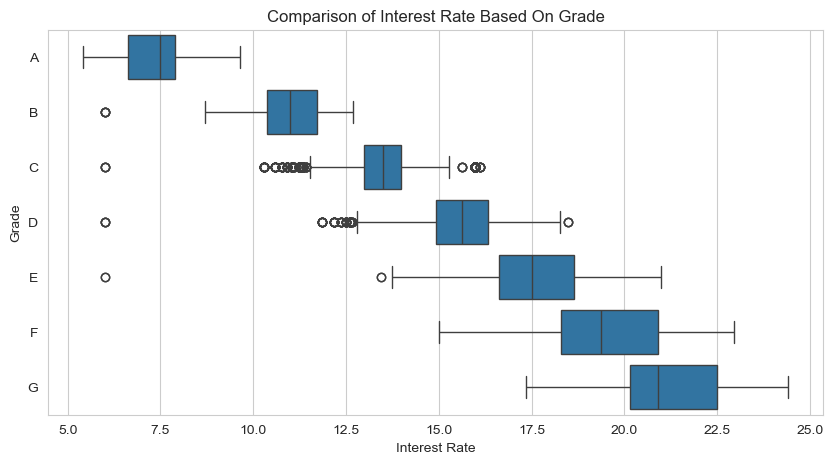

In [1807]:
## Import Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Create a boxplot to visualize the relationship between interest rate and grade.
plt.figure(figsize=(10, 5))  # Setting the figure size
sns.boxplot(data=loan, x='int_rate', y='grade')  # Create the boxplot

# Customize labels and title
plt.xlabel('Interest Rate')
plt.ylabel('Grade')
plt.title('Comparison of Interest Rate Based On Grade', fontsize=12)

# Show the plot
plt.show()

### <span style='color:red'>INFERENCE</span>:The Grade represents the Risk factor, therefore we can say interst rate increases with the risk.

### <span style='color:orange'>4.2 DTI over grade for loan status</span>

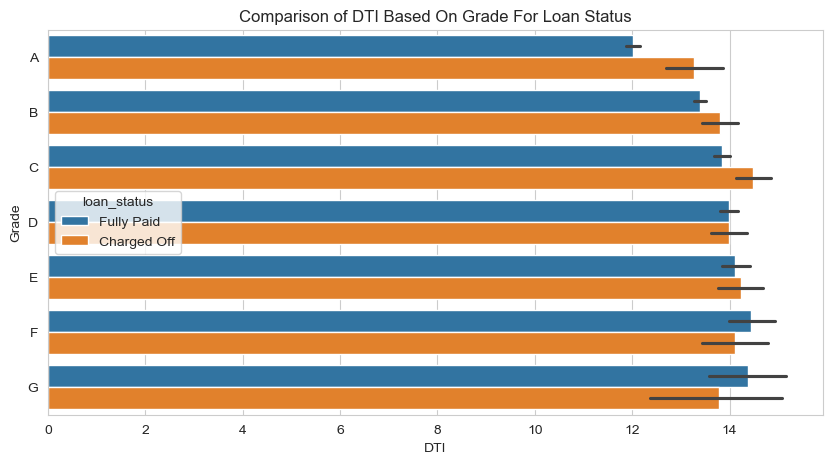

In [1811]:
## Import Libraries
import matplotlib.pyplot as plt
import seaborn as sns

## Adjust figure size as needed
plt.figure(figsize=(10, 5)) 

sns.barplot(data=loan, x='dti', y='grade', hue='loan_status')

plt.xlabel('DTI')
plt.ylabel('Grade')
plt.title('Comparison of DTI Based On Grade For Loan Status', fontsize=12)
plt.show()

### <span style='color:red'>INFERENCE</span>: 
#### 1.The Grade A is the lowest risk factor also has lowest DTI ratio.
#### 2.We can state, that higher grade has lower rate.

### <span style='color:orange'>4.3 Annual income to public record bankruptcy over loan status</span>

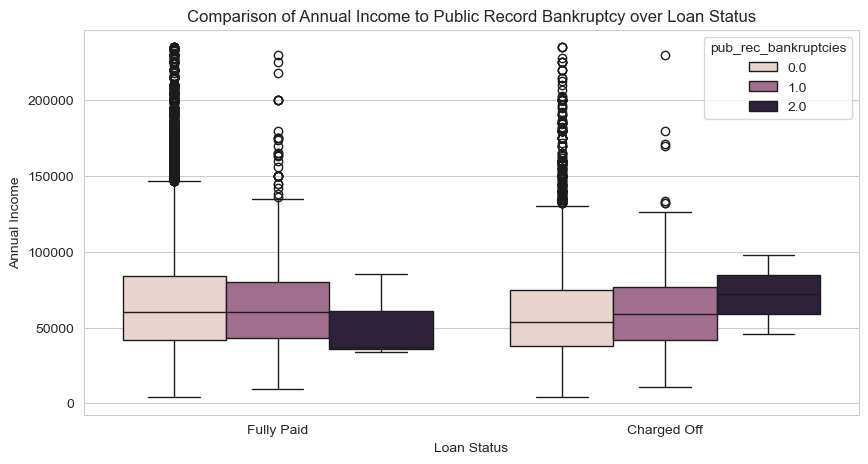

In [1814]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'loan' is your DataFrame
plt.figure(figsize=(10, 5))
sns.boxplot(x='loan_status', y='annual_inc', hue='pub_rec_bankruptcies', data=loan)
plt.xlabel('Loan Status')
plt.ylabel('Annual Income')
plt.title('Comparison of Annual Income to Public Record Bankruptcy over Loan Status', fontsize=12)
plt.show()

## <span style='color:red'>INFERENCE</span> :
###  A.Annual Income Distribution:
#### 1.For both Fully Paid and Charged Off loans, the median annual income is generally lower for borrowers with more public record bankruptcies.
#### 2.Borrowers with 0 bankruptcies have higher median incomes compared to those with 1 or 2 bankruptcies in both loan status categories.

###  B.Impact of Bankruptcies on Loan Status:
#### 1.Borrowers with no bankruptcies who fully paid their loans tend to have higher incomes compared to those who charged off their loans.

###  C.Outliers:
#### 1.There are several high-income outliers in each category, more prominently seen in borrowers with 0 bankruptcies.
#### 2.The presence of these outliers indicates that while most borrowers fall within a certain income range, there are a few with significantly higher incomes.

#### * Overall, the plot suggests that higher annual income and fewer public record bankruptcies are associated with a higher likelihood of fully paying off loans.

### <span style='color:orange'>4.4 Heatmap of correlation between variables</span>

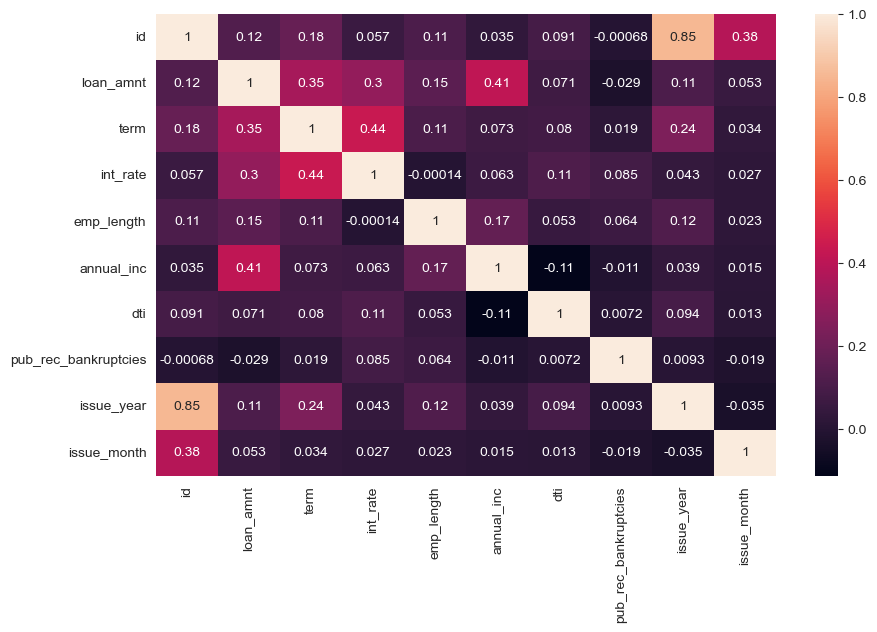

In [1817]:
# Heatmap of correlation between variables
# Select only numeric columns
numeric_columns = loan.select_dtypes(include=['number'])
# Create the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_columns.corr(), annot=True)
plt.show()

## <span style='color:red'>INFERENCE</span> :
### A.Strong Positive Correlations:
#### 1. id and issue_year (0.85): IDs are highly correlated with the year the loan was issued.
#### 2. loan_amnt and annual_inc (0.41): Loan amounts tend to increase with annual income.
#### 3. term and int_rate (0.44): Longer loan terms are associated with higher interest rates.

### B.Moderate to Low Correlations:
#### 1. loan_amnt and int_rate (0.35): Higher loan amounts slightly correlate with higher interest rates.

### C.Negative Correlations:
#### 1. annual_inc and dti (-0.11): Annual income has a small negative correlation with debt-to-income ratio.

# <span style='color:green'>Insights</span>
## <span style='color:purple'>Univariate Analysis</span>
#### Please refer to the 'Inferences' captured under Univariate Analysis.

## <span style='color:purple'>Segmented Univariate Analysis</span>
#### Please refer to the 'Inferences' captured under Segmented Univariate Analysis.

## <span style='color:purple'>Derived Metrics Analysis</span>
#### Please refer to the 'Derived Metrics Analysis' segment.

## <span style='color:purple'>Bivariate Analysis</span>
### 1.The Grade represents the Risk factor, therefore we can say interest rate increases with the risk.
### 2.The borrowers are mostly having no record of Public Recorded Bankruptcy and are safe choice for loan.

# <span style='color:purple'>Recommendations</span>
## * <span style='color:blue'>Major Driving factor which can be used to predict the chance of defaulting loans and avoiding Credit Loss:</span>
### DTI 
### Loan Amount
### Interest Rate
### Grades
### Annual income
### Pub_rec_bankruptcies
### Verification_Status